# Association Analysis

Association analysis uses machine learning algorithms to extract hidden relationships from large datasets. In this assignment we'll be using one of the most commonly used algorithms for association rule mining - the Apriori algorithm.

The data we'll use comes from a bakery called "The Bread Basket", located in the historic center of Edinburgh. The dataset contains more than 9000 transactions from the bakery. The file contains the following columns:

- Date. Categorical variable that tells us the date of the transactions (YYYY-MM-DD format). The column includes dates from 2016-10-30 to 2017-04-09.

- Time. Categorical variable that tells us the time of the transactions (HH:MM:SS format).

- Transaction. Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction.

- Item. Categorical variable with the products purchased.

## Installation
`scikit-learn` does not provide any functionality for association rule mining so for this assignment you will be using the `MLxtend` library. The documentation for this library is available [here](http://rasbt.github.io/mlxtend/).

You will need to install the `MLxtend` library. There are several ways of doing this; you can follow the instructions below, or see the setup guide  [here](http://rasbt.github.io/mlxtend/installation/).


### Conda

Most of you should use Conda to do the install. If you downladed Anaconda in order to get Jupyter Notebooks (which is the most common way to get Jupyter Notebooks), then you will want to install `MLxtend` using Conda. 

Open a command prompt / terminal window and type:

`conda install mlxtend --channel conda-forge`

### PyPi

You can also install via pip. Note: If you are running Jupyter notebooks through an Anaconda install, then pip may not place the `MLxtend` libraries in the correct place for use in Jupyter. 

Open a command prompt / terminal window and type:

`pip3 install mlxtend`


## Apriori Algorithm

The Apriori algorithm is a classical algorithm in data mining. It is used for mining frequent itemsets and relevant association rules. In this part, you'll be running this algorithm for generating the itemsets that occur more than the `min_sup` threshold. Based on these frequent itemsets you'll find association rules that have confidence above the `min_conf` threshold.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
%matplotlib inline

In [3]:
# read in dataset 
def load_dataset(file_name):
    with open(file_name, 'r') as f:
        content = f.readlines()[1:]
    transactions = []
    prev_tid = -1
    for t in content:
        t = t.strip().split(',')[-2:]
        tid = t[0]
        item = t[1]
        if prev_tid != tid:
            prev_tid = tid
            transactions.append([item])
        else:
            transactions[-1].append(item)
    return transactions

In [4]:
# load data 
dataset = load_dataset('BreadBasket_DMS.csv')

print("Num transactions:", len(dataset))
dataset[:10]

Num transactions: 9531


[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

**Q1.** Many transactions in the dataset include the item "NONE." First, find and remove all the "NONE" items from the dataset.

Once you have removed the NONEs, find the top 10 best-selling items in the bakery. Create a bar chart to display the total number of transactions for each of the top 10 selling items. Sort the bar chart by frequency (the top most sold item first, down to the 10th most sold item).

In [5]:
# remove NONEs
for i in range(len(dataset)): 
    for j in range(len(dataset[i])): 
        try: 
            if (dataset[i][j] == "NONE"): 
                del dataset[i][j]
        except: 
            continue
            
# remove empty lists
for i in range(len(dataset)): 
    try: 
        if len(dataset[i]) == 0: 
            del dataset[i]
    except: 
        continue

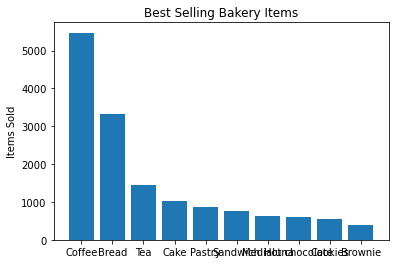

In [7]:
# create item:sold amount list 
item_dict = {}
for i in range(len(dataset)): 
    for j in range(len(dataset[i])): 
        if ((dataset[i][j]) not in item_dict):
            item_dict[str(dataset[i][j])] = 1
        else: 
            item_dict[str(dataset[i][j])] += 1
            
item_dict = sorted(item_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)       

# create bar chart 
objects = [] 
values = [] 
for i in range(10): 
    objects.append(item_dict[i][0])
    values.append(item_dict[i][1])
    
y_pos = np.arange(len(objects))

# plot
plt.bar(y_pos, values, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Items Sold')
plt.title('Best Selling Bakery Items')

plt.show()

**Q2.** 

a.) Using `mlxtend.preprocessing.TransactionEncoder` transform `dataset` into an array format suitable for the `mlxtend` library. You will need to call `fit` then `transform`. 

`TransactionEncoder` learns unique items from the dataset and transforms each transaction into a one-hot encoded boolean numpy array. For example, the resulting encoded dataset will be represented by something like this, where each row is a transaction. If the first transaction contained ['Crepe', 'Jam'], this would correspond to the first row in the encoded table. 

<img src="table.png">

Print the `shape` of the resulting encoded numpy array.

b.) `TransactionEncoder` also has a function `inverse_transform` that allows you to tranform one-hot encoded transactions back to the item labels. Try it out on the first 5 transactions and display the items in the first 5 transactions.

In [8]:
# transform dataset 
encoder = TransactionEncoder()
encoded_data = encoder.fit_transform(dataset)
encoded_data.shape

(9472, 95)

In [9]:
# recode data 
recoded_data = encoded_data[:5]
encoder.inverse_transform(recoded_data)

[['Bread'],
 ['Scandinavian'],
 ['Cookies', 'Hot chocolate', 'Jam'],
 ['Muffin'],
 ['Bread', 'Coffee', 'Pastry']]

**Q3.** Convert the encoded numpy array from Q2 part a into a pandas dataframe. Use the `TransactionEncoder`'s `.columns_` attribute as the column headers. Print the head of the resulting dataframe. 

In [10]:
# to pandas dataframe 
encoded_data = pd.DataFrame(encoded_data)
encoded_data.columns = encoder.columns_
encoded_data.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Q4.** Use the `mlxtend.frequent_patterns.apriori` to generate the frequent itemsets with minimum support of 1%. Display these itemsets along with their support values.

In [11]:
# generate frequent itemsets
itemset = apriori(encoded_data, min_support = 0.01, use_colnames = True)
itemset

,support,itemsets
0,0.036318,(Alfajores)
1,0.016047,(Baguette)
2,0.326964,(Bread)
3,0.040013,(Brownie)
4,0.103780,(Cake)
...,...,...
56,0.023649,"(Toast, Coffee)"
57,0.014358,"(Sandwich, Tea)"
58,0.010030,"(Coffee, Bread, Cake)"
59,0.011191,"(Coffee, Bread, Pastry)"


**Q5.** Using the frequent itemsets and support counts in Q4, find and display all the maximal frequent itemsets along with their support fraction. Also print a count of how many maximal frequent itemsets you have found.

In [12]:
# get sets 
freq_items = [] 
sup_counts = [] 
freq_list = [] 
sup_list = [] 
for i in itemset: 
    freq_items.append(itemset["itemsets"])
    sup_counts.append(itemset["support"])
    
for i in range(itemset.shape[0]): 
    freq_list.append(freq_items[0][i])
    sup_list.append(sup_counts[0][i])
    
sets = ([list(x) for x in freq_list])
sets = [set(x) for x in sets]

freq_dict = {}
for i in range(len(sets)): 
    freq_dict[str(sets[i])] = sup_list[i]

In [13]:
mfitems = []
for freq in sets: 
    if (len(mfitems) == 0): 
        mfitems.append(freq)
    else: 
        # subset check 
        exit = 0 
        for i in range(len(mfitems)): 
            if (freq.issubset(mfitems[i]) == True): 
                exit = 1
                break
        
        if (exit == 1): 
            exit = 0 
            continue 
        else: 
            mfitems.append(freq)
            
        # superset check 
        subsets = []
        for i in range(len(mfitems)): 
            if (freq.issuperset(mfitems[i]) == True): 
                subsets.append(mfitems[i]) 

        # delete subsets 
        new_list = []
        for i in range(len(mfitems)): 
            if ((mfitems[i] not in subsets)): 
                new_list.append(mfitems[i]) 
        mfitems = new_list[:]       

for i in range(len(mfitems)): 
    print(str(mfitems[i]) + ", support: " + str(freq_dict[str(mfitems[i])]))

print("maximal frequent itemsets found:", len(mfitems))

{'Coffee', 'Alfajores'}, support: 0.019636824324324325
maximal frequent itemsets found: 1


**Q6.** Using the frequent itemsets and support counts in Q4, find all the closed frequent itemsets along with their support fraction. Also print a count of how many closed frequent itemsets you have found.

In [14]:
cfitems = []
for freq in sets: 
    if (len(cfitems) == 0): 
        cfitems.append(freq)
    else: 
        # subset check 
        exit = 0 
        for i in range(len(cfitems)): 
            if (freq.issubset(cfitems[i]) == True): 
                if (float(freq_dict[str(freq)]) > float(freq_dict[str(cfitems[i])])): 
                    cfitems.append(freq)  
                else: 
                    exit = 1
                    break
            else: 
                exit = 1 
                break
        
        if (exit == 1): 
            exit = 0
            continue 
            
        # superset check 
        subsets = []
        for i in range(len(cfitems)): 
            if (freq.issuperset(cfitems[i]) == True): 
                if (float(freq_dict[cfitems[i]]) == float(freq_dict[str(freq)])):
                    subsets.append(cfitems[i]) 
                else: 
                    exit = 1
                    break 
            else: 
                exit = 1
                break
                
        if (exit == 1): 
            exit = 0
            continue 
            
        # delete subsets 
        new_list = []
        for i in range(len(cfitems)): 
            if ((cfitems[i] not in subsets)): 
                new_list.append(cfitems[i]) 
        cfitems = new_list[:]       

for i in range(len(cfitems)): 
    print(str(cfitems[i]) + ", support: " + str(freq_dict[str(cfitems[i])]))

print("maximal frequent itemsets found:", len(cfitems))

{'Alfajores'}, support: 0.036317567567567564
maximal frequent itemsets found: 1


**Q7.** Use `mlxtend.frequent_patterns.association_rules` to calculate rules with a confidence level of 0.25 for the frequent itemsets you generated in Q4.

In [213]:
con_rules = association_rules(itemset, metric = "confidence", min_threshold = 0.25)
con_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Bread),0.036318,0.326964,0.010346,0.284884,0.871301,-0.001528,0.941156
1,(Alfajores),(Coffee),0.036318,0.478041,0.019637,0.540698,1.131071,0.002276,1.136418
2,(Brownie),(Bread),0.040013,0.326964,0.010769,0.269129,0.823117,-0.002314,0.920869
3,(Bread),(Coffee),0.326964,0.478041,0.089949,0.275105,0.575485,-0.066353,0.720048
4,(Cookies),(Bread),0.054371,0.326964,0.014464,0.266019,0.813605,-0.003314,0.916967
5,(Medialuna),(Bread),0.061761,0.326964,0.016892,0.273504,0.836497,-0.003302,0.926415
6,(Pastry),(Bread),0.086043,0.326964,0.029139,0.338650,1.035743,0.001006,1.017671
7,(Brownie),(Coffee),0.040013,0.478041,0.019637,0.490765,1.026618,0.000509,1.024988
8,(Cake),(Coffee),0.103780,0.478041,0.054688,0.526958,1.102330,0.005077,1.103411
9,(Cookies),(Coffee),0.054371,0.478041,0.028188,0.518447,1.084524,0.002197,1.083908


**Q8.** An important step in generating a set of association rules is to determine the optimal thresholds for support and confidence. If we set these values too low we will get a lot of rules and most of them will not be useful. Generate the frequent itemsets with minimum support of 0.5% and plot the number of rules generated with respect to the confidence threshold by varying its value between 0 and 1 with increments of 0.1. What happens when we increase the confidence level? Why?

In [229]:
sup_rules = association_rules(itemset, metric = "support", min_threshold = 0.05)
sup_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bread),(Coffee),0.326964,0.478041,0.089949,0.275105,0.575485,-0.066353,0.720048
1,(Coffee),(Bread),0.478041,0.326964,0.089949,0.188163,0.575485,-0.066353,0.829028
2,(Cake),(Coffee),0.103780,0.478041,0.054688,0.526958,1.102330,0.005077,1.103411
3,(Coffee),(Cake),0.478041,0.103780,0.054688,0.114399,1.102330,0.005077,1.011992


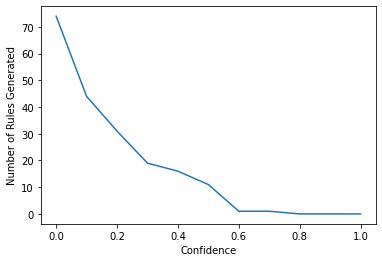

In [15]:
conf_list = []
rule_list = []

for i in range(0, 11, 1): 
    thr = (i/10)
    sup_rules = association_rules(itemset, metric = "confidence", min_threshold = thr)
    conf_list.append(thr)
    rule_list.append(sup_rules.shape[0])

# plot 
plt.plot(conf_list, rule_list)
plt.xlabel("Confidence")
plt.ylabel("Number of Rules Generated")
plt.show;

In [ ]:
'''
As the confidence level is increased, the number of rules generated decreases. Confidence measures the reliability 
of a rule. Therefore, as a higher confidence is reached, the chances of finding rules with correlations between 
items decreases. 
'''

**Q9.** What value would you choose for the minimum confidence threshold based on the plot in Q8? Why? Display the rules generated for your chosen value. Take a look at the generated rules. Are they interesting? Why/why not?

In [246]:
sup_rules = association_rules(itemset, metric = "confidence", min_threshold = 0.55)
sup_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Medialuna),(Coffee),0.061761,0.478041,0.035156,0.569231,1.190758,0.005632,1.211692
1,(Pastry),(Coffee),0.086043,0.478041,0.047508,0.552147,1.155022,0.006376,1.165471
2,(Spanish Brunch),(Coffee),0.018159,0.478041,0.010874,0.598837,1.252691,0.002194,1.301116
3,(Toast),(Coffee),0.033573,0.478041,0.023649,0.704403,1.473520,0.007600,1.765778


In [ ]:
'''
Based off of the plot, I decided to choose a confidence threshold of 0.55, since it was a good point inbetween 
the interval where the number of rules generated levels off to zero. From the rules generated, it seems that coffee
is the only consequent. Not only that, but the calculated lift's are all above 1.0, therefore proving that these
rules are not statistically independent and that there is indeed a positive correlation. 
'''